In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

In [13]:
#Loading IMDB dataset
dataset = pd.read_csv('IMDB_Dataset.csv')

In [14]:
#Cleaning and preprocessing the data
def preprocess_text(review):
    review=re.sub(r'[^\w\s]','',review)
    review=review.lower().strip()
    return review
dataset['review']=dataset['review'].apply(preprocess_text)
dataset['sentiment']=dataset['sentiment'].map({'positive':1,'negative':0})

In [15]:
#Splitting the dataset into training and testing sets
X=dataset['review']
y=dataset['sentiment']
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [20]:
#Tokenization
tokenizer=Tokenizer(num_words=8000)#vocab-size=8000
tokenizer.fit_on_texts(X_train)
X_train_seq=tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)
X_train_padded=pad_sequences(X_train_seq,maxlen=200)#max pad len - 200
X_test_padded=pad_sequences(X_test_seq,maxlen=200)

In [21]:
#Building the sentiment analysis model
model=Sequential([
    Embedding(input_dim=8000,output_dim=128, input_length=200),
    Dropout(0.3),
    LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

d:\SentimentAnalysis\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
#Model Training
history=model.fit(
    X_train_padded,y_train,epochs=5,batch_size=64,validation_data=(X_test_padded, y_test),verbose=2
)

Epoch 1/5
586/586 - 222s - 379ms/step - accuracy: 0.9276 - loss: 0.1905 - val_accuracy: 0.8850 - val_loss: 0.3184
Epoch 2/5
586/586 - 206s - 352ms/step - accuracy: 0.9357 - loss: 0.1684 - val_accuracy: 0.8799 - val_loss: 0.3591
Epoch 3/5
586/586 - 196s - 335ms/step - accuracy: 0.9452 - loss: 0.1465 - val_accuracy: 0.8663 - val_loss: 0.3877
Epoch 4/5
586/586 - 198s - 337ms/step - accuracy: 0.9486 - loss: 0.1379 - val_accuracy: 0.8758 - val_loss: 0.3691
Epoch 5/5
586/586 - 190s - 324ms/step - accuracy: 0.9558 - loss: 0.1200 - val_accuracy: 0.8741 - val_loss: 0.3924


In [24]:
#Model Evaluation
predictions=(model.predict(X_test_padded)>0.5).astype(int)
accuracy=accuracy_score(y_test,predictions)
print(f"Model Accuracy: {accuracy:.2%}")

391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step
Model Accuracy: 87.41%


In [25]:
#Confusion Matrix and Classification Report
print("\nClaasification Report:\n", classification_report(y_test,predictions))
cm=confusion_matrix(y_test,predictions)


Claasification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      6157
           1       0.85      0.91      0.88      6343

    accuracy                           0.87     12500
   macro avg       0.88      0.87      0.87     12500
weighted avg       0.88      0.87      0.87     12500



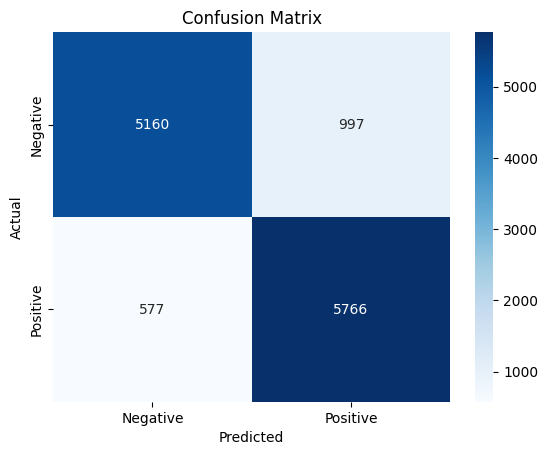

In [33]:
#Confusion Matrix Vizualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()